# OSKM ChromVAR vs Expression Correlation

For Supp figure, correlation between OSKM ChromVAR and expression.

- Seurat object
- ChromVAR values
- ATAC metadata
- Cluster config
- RNA transfered clusters
- CCA coembedding coordinates for RNA + ATAC

In [86]:
library(ggplot2)
library(Seurat)
library(scattermore)
library(RANN)

In [9]:
DAYS = c("D0", "D2", "D4", "D6", "D8", "D10", "D12", "D14", "iPSC")

### Inputs

In [3]:
rna = readRDS("../../analysis/20200828_RNA_Seurat/sessions/20210725_n59378/seurat.rds")

In [10]:
cluster_config = read.table("../configs/cluster.tsv", comment.char = '', sep='\t', header=T)
cluster_config

cluster,colour,description,new_cluster
<int>,<fct>,<fct>,<int>
1,#B03743,Fibroblast,1
2,#E85F6D,Fibroblast-like,3
3,#7C2730,Fibroblast-like,2
4,#F0A118,Intermediate,12
5,#78A824,Pre-iPSC,13
6,#A6D854,Pre-iPSC,14
7,#F01D35,Fibroblast-like,5
8,#13C4A3,iPSC,15
9,#406614,Partially-reprogrammed,10


In [11]:
metaData = read.table("../../analysis/20200206_pmat_snapATAC/sessions/20210717_n62599/metadata.tsv", header = T)
rownames(metaData) = paste(metaData$sample, metaData$barcode, sep='_')
metaData$sample = factor(metaData$sample, levels=DAYS)
dim(metaData)
head(metaData, 5)

[1] 62599     5

,barcode,sample,umap1,umap2,cluster
,<fct>,<fct>,<dbl>,<dbl>,<int>
D0_AAACACGCTAGTACGG,AAACACGCTAGTACGG,D0,-1.8037916,-9.507773,1
D0_AAACACGCTCTTCAAG,AAACACGCTCTTCAAG,D0,0.7074551,-9.406457,1
D0_AAACACGCTGATCCAT,AAACACGCTGATCCAT,D0,-2.9559933,-7.641148,1
D0_AAACCCTGACCGCTAG,AAACCCTGACCGCTAG,D0,-3.6119107,-8.443144,1
D0_AAACCCTGATTGCAGT,AAACCCTGATTGCAGT,D0,0.5002119,-8.759449,3


In [4]:
OSKM_cv = read.table("../../analysis/20200522_OSK_frip/sessions/20210717_n62599/OSKM_ChromVAR.tsv")
head(OSKM_cv)

,POU5F1,SOX2,KLF4,MYC,POU5F1.SOX2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
D0_AAACACGCTAGTACGG,-0.2122726,-0.09810214,-0.11072911,0.07220178,-0.3886107
D0_AAACACGCTCTTCAAG,-0.2213217,-0.04278614,-0.09111312,0.09327532,-0.3022712
D0_AAACACGCTGATCCAT,-0.2494031,-0.07451371,-0.09690176,0.02589021,-0.3666447
D0_AAACCCTGACCGCTAG,-0.1958958,-0.12078850,-0.08822089,0.09043976,-0.3711973
D0_AAACCCTGATTGCAGT,-0.1414688,-0.02213143,-0.07480125,0.16515913,-0.2970046
D0_AAACCGTACACACCTA,-0.2181193,-0.08840394,-0.09823535,0.06612842,-0.3674076


In [7]:
coembedding = read.table("../../analysis/20200828_RNA_Seurat/sessions/20210725_n59378//atac.20210717_n62599.harmony.cca.feat.tsv")

all(rownames(coembedding) == c(colnames(rna), rownames(metaData)))

dim(coembedding)
head(coembedding)

[1] TRUE

[1] 121977     31

,tech,harmony_1,harmony_2,harmony_3,harmony_4,harmony_5,harmony_6,harmony_7,harmony_8,harmony_9,⋯,harmony_21,harmony_22,harmony_23,harmony_24,harmony_25,harmony_26,harmony_27,harmony_28,harmony_29,harmony_30
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAACCCAAGAGTGACC-1,rna,0.3318543,0.078844799,0.19686346,0.24728053,0.24823083,0.21781660,0.05513768,0.09840094,0.06001719,⋯,0.06987450,0.19585275,0.22086422,0.065914274,0.41981392,0.07326427,0.08790301,0.01640147,0.1652042925,0.28467393
AAACCCAAGTGCCAGA-1,rna,0.3107045,0.063535342,0.13427040,0.11744078,0.26118939,0.01093358,0.06960702,0.05031243,0.13688733,⋯,-0.15700395,0.19841570,-0.09692396,0.105738860,0.09445307,-0.02764373,-0.13470681,0.04082958,-0.1464773315,0.39036129
AAACCCACACCATTCC-1,rna,0.2186482,0.057591141,0.08597532,0.23926343,0.10291361,0.05666256,0.04633591,-0.04667989,0.20845048,⋯,-0.05308467,-0.14764309,0.07441976,0.179796586,-0.57238039,-0.03927423,0.08966221,-0.14192222,-0.0006151037,0.01701897
AAACCCACACGCGTCA-1,rna,0.1354634,0.026727779,0.04702000,0.18211861,0.21177460,0.15148831,0.01201230,-0.11650968,-0.08746014,⋯,-0.14970307,-0.02442402,0.24178986,0.260330627,-0.40856006,0.01090968,0.11145732,-0.35581698,0.1841355614,-0.14943212
AAACCCAGTCCATAGT-1,rna,0.1859827,0.128802123,0.08006687,0.09405357,-0.08214485,0.22143100,-0.02319874,-0.10587808,0.01696646,⋯,-0.07264296,-0.40922847,0.07522912,0.001384636,0.13925381,0.10259051,0.03265513,0.10150240,-0.0119577093,-0.04770397
AAACCCAGTTATTCTC-1,rna,0.1866762,-0.006850418,0.03265043,0.17678651,0.10718547,-0.20650718,0.12158065,0.04217246,0.03221731,⋯,0.15067746,-0.01025227,-0.21868856,0.111269829,0.01707550,0.17315983,0.14957173,-0.50448469,-0.0133106278,0.02571105


In [12]:
atac.rna.label = read.table("../../analysis/20200828_RNA_Seurat/sessions/20210725_n59378/atac.20210717_n62599.cluster.transfer.tsv",
                           header=T)
rownames(atac.rna.label) = atac.rna.label$barcode
atac.rna.label$barcode = NULL

all(rownames(atac.rna.label)==colnames(rna))

# transfer to new cluster
atac.rna.label$atac_new_cluster = cluster_config[atac.rna.label$atac_cluster, "new_cluster"]

head(atac.rna.label)

[1] TRUE

,sample,atac_cluster,atac_new_cluster
,<fct>,<int>,<int>
AAACCCAAGAGTGACC-1,D0,1,1
AAACCCAAGTGCCAGA-1,D0,1,1
AAACCCACACCATTCC-1,D0,1,1
AAACCCACACGCGTCA-1,D0,1,1
AAACCCAGTCCATAGT-1,D0,1,1
AAACCCAGTTATTCTC-1,D0,1,1


In [21]:
metaData$cluster_new_id = cluster_config[metaData$cluster, "new_cluster"]

## Pre-processing

In [24]:
# find nearest neigbor for each ATAC cell in RNA, restricted to same cluster
K = 10
atac2rna_same_cluster_nn = matrix(0, nrow(metaData), K)

for (c in sort(unique(metaData$cluster_new_id))) {
    c2c_nn = nn2(coembedding[coembedding$tech=="rna", 2:ncol(coembedding)][atac.rna.label$atac_new_cluster == c, ],
                    query=coembedding[coembedding$tech=="atac", 2:ncol(coembedding)][metaData$cluster_new_id == c,],
                    K)$nn.idx
    
    orig_rna_idx = which(atac.rna.label$atac_new_cluster == c)
    
    # get original idx
    c2c_nn = matrix(orig_rna_idx[c2c_nn], nrow=nrow(c2c_nn))
        
    atac2rna_same_cluster_nn[metaData$cluster_new_id == c, ] = c2c_nn
}

In [27]:
head(atac2rna_same_cluster_nn)

3835,10337,10737,11971,11947,11770,11487,4274,12016,10811
1509,5944,7563,4354,6950,6701,757,2517,6810,7644
3689,5756,9218,1060,4938,48,7097,5279,7161,2237
5335,10644,10279,3776,4868,6167,3411,9130,1893,5580
2032,3618,16481,15639,8700,9321,16412,13483,13898,11180
8555,9124,5281,8608,3031,6016,1891,2104,8103,1915


In [37]:
ATAC_ngb_df = data.frame(ATAC=rownames(coembedding[coembedding$tech=="atac",]),
           RNA_ngb=(rownames(coembedding[coembedding$tech=="rna",])[atac2rna_same_cluster_nn[,1]]))
head(ATAC_ngb_df)

,ATAC,RNA_ngb
,<fct>,<fct>
1,D0_AAACACGCTAGTACGG,CGGGACTTCTACCAGA-1
2,D0_AAACACGCTCTTCAAG,AGGGAGTTCGGAATTC-1
3,D0_AAACACGCTGATCCAT,CGATGCGCAGAAATTG-1
4,D0_AAACCCTGACCGCTAG,GCACGTGAGAGAATCT-1
5,D0_AAACCCTGATTGCAGT,ATCTCTATCTAGTCAG-1
6,D0_AAACCGTACACACCTA,TGCAGGCCATGCGTGC-1


In [123]:
# write.table(ATAC_ngb_df, "../../analysis/20200828_RNA_Seurat/sessions/20210725_n59378/ATAC_nearest_RNA_ngb.tsv",sep='\t', row.names = F, quote=F)

In [119]:
plot_scatter <- function(gene) {
    df = data.frame(
        cv = OSKM_cv[,gene],
        expr = as.vector(rna[["RNA"]][gene])[atac2rna_same_cluster_nn[,1]],
        clust = metaData$cluster_new_id
    )
    
    df = df[sample(nrow(df)), ]

    ggplot(df, aes(x=expr, y=cv)) +
#     geom_scattermore(aes(x=expr, y=cv, col=factor(clust)), pointsize=10, pixels=c(3000,3000)) +
#     scale_color_manual(values=as.character(cluster_config[order(cluster_config$new_cluster), "colour"])) +
    geom_hex(bins = 40, aes(fill=log10(..count..))) +
  scale_fill_continuous(type = "viridis") +
    theme_classic() +
    xlab("Log2 Expression") +
    ylab("ChromVAR Deviation") +
    ggtitle(gene) +
    theme(plot.title = element_text(hjust = 0.5),
          text = element_text(size=12),
          axis.line=element_blank(),
#           axis.text.x=element_blank(),
#           axis.text.y=element_blank(),
#           axis.ticks=element_blank(),
          panel.border = element_rect(colour = "black", fill=NA, size=0.5)) +
    annotate("text", x=max(df$expr)-1, y= max(df$cv), 
             label=sprintf("Spearman: %.2f", 
                           cor(df$expr, df$cv, method='spearman')))
}

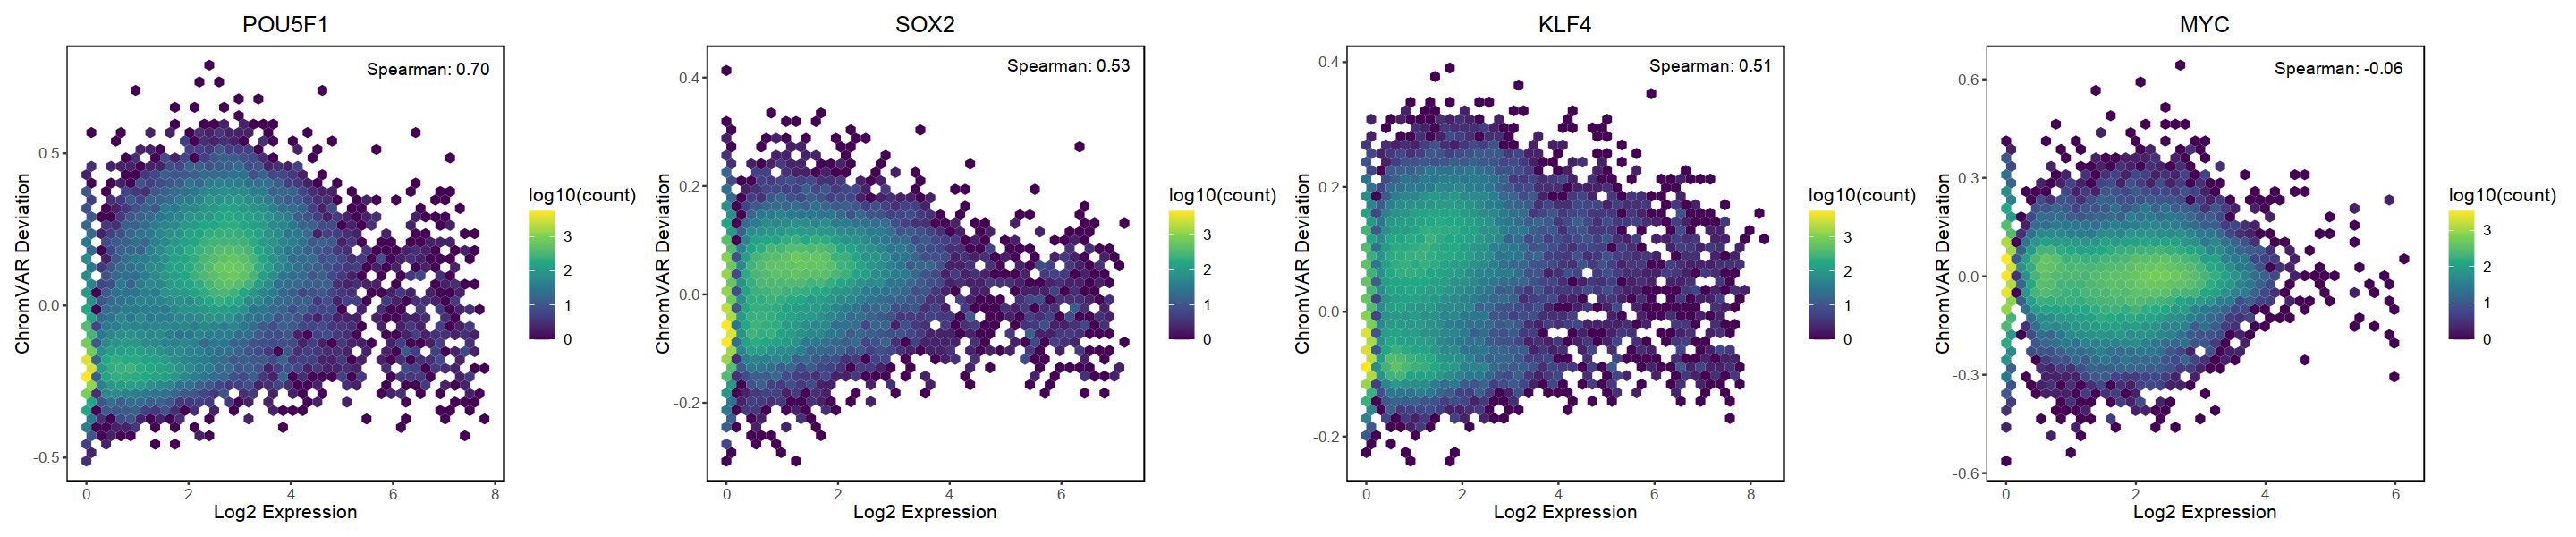

In [124]:
options(repr.plot.width = 24, repr.plot.height = 5)

p = plot_scatter("POU5F1") | plot_scatter("SOX2") | plot_scatter("KLF4") | plot_scatter("MYC") 
p

In [127]:
ggsave("./subfigs/supp_chromvar_expr_scatter.pdf", p, width=24, height=5, useDingbats=F)

---

In [125]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.6 LTS

Matrix products: default
BLAS/LAPACK: /users/surag/anaconda3/envs/r36_cran/lib/libopenblasp-r0.3.9.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] scattermore_0.7 RANN_2.6.1      Seurat_3.1.5    ggplot2_3.3.3  

loaded via a namespace (and not attached):
 [1] nlme_3.1-147        tsne_0.1-3          RcppAnnoy_0.0.16   
 [4] RColorBrewer_1.1-2  httr_1.4.1          repr_1.1.0         
 [7] sctransform_0.2.1   tools_3.6.3         R6_2.4.1    